In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('german_credit_data.csv',index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

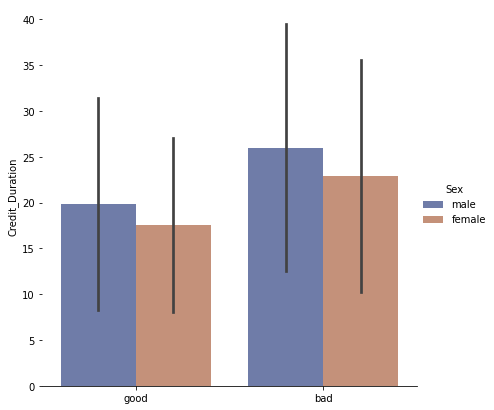

In [5]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Risk", y="Duration", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Credit_Duration")

C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


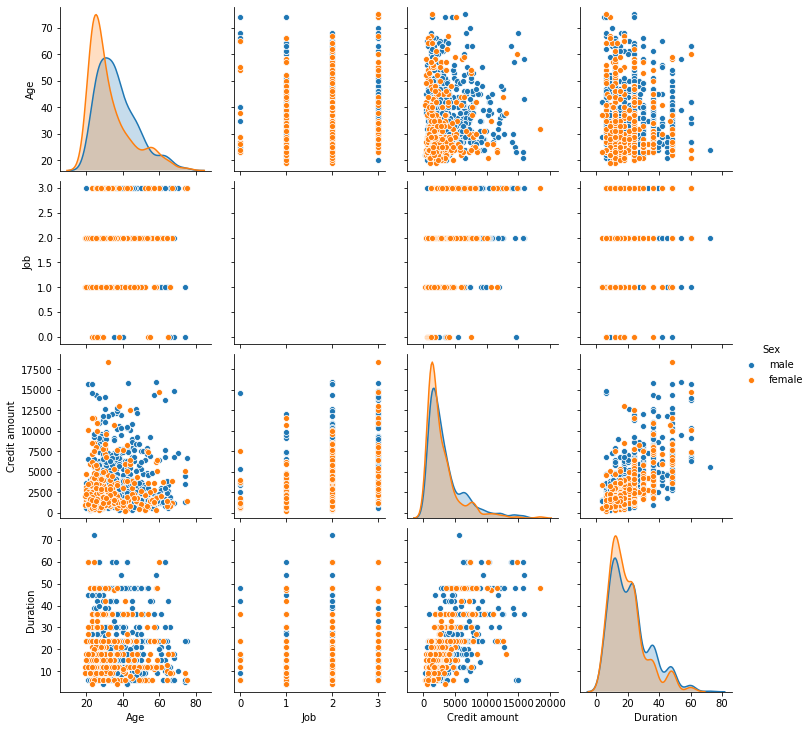

In [7]:
sns.pairplot(df,hue='Sex')

C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


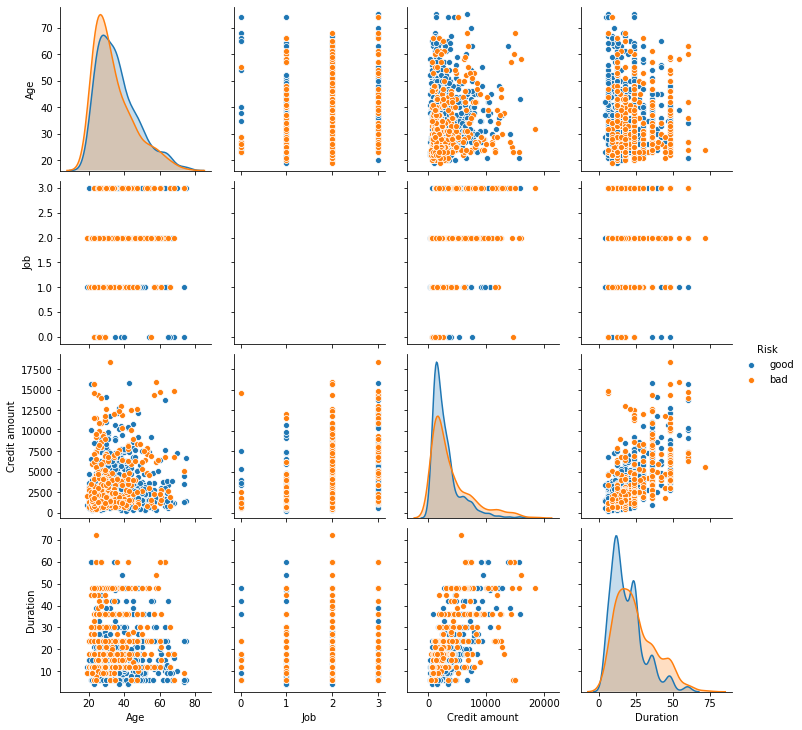

In [8]:
sns.pairplot(df,hue='Risk')

In [9]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between numerical parameters')

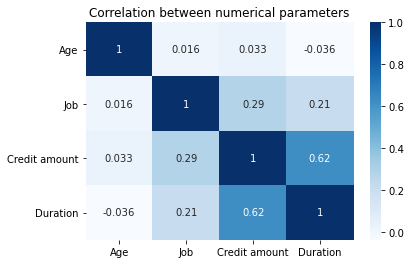

In [19]:
correlation = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk']].corr()
sns.heatmap(correlation,annot=True,cmap='Blues')
plt.title('Correlation between numerical parameters')

In [12]:
##The Density plot gives an intuitive understanding of the underlying distribution of the attribute.

def Plot_dis(text):
  f= plt.figure(figsize=(21,5))
  
  ax=f.add_subplot(131)
  sns.distplot(df[text],color='b',ax=ax)
  ax.set_title('Distribution of {}'.format(text))

  ax=f.add_subplot(132)
  sns.distplot(df[(df.Risk == 'bad')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for High Risk'.format(text))
  
  ax=f.add_subplot(133)
  sns.distplot(df[(df.Risk == 'good')][text],color='c',ax=ax)
  ax.set_title('Distribution of {} for Non-Risk'.format(text))

  f1= plt.figure(figsize=(13,5))
  
  ax=f1.add_subplot(121)
  sns.distplot(df[(df.Sex == 'male')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for male'.format(text))

  ax=f1.add_subplot(122)
  sns.distplot(df[(df.Sex == 'female')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for female'.format(text))

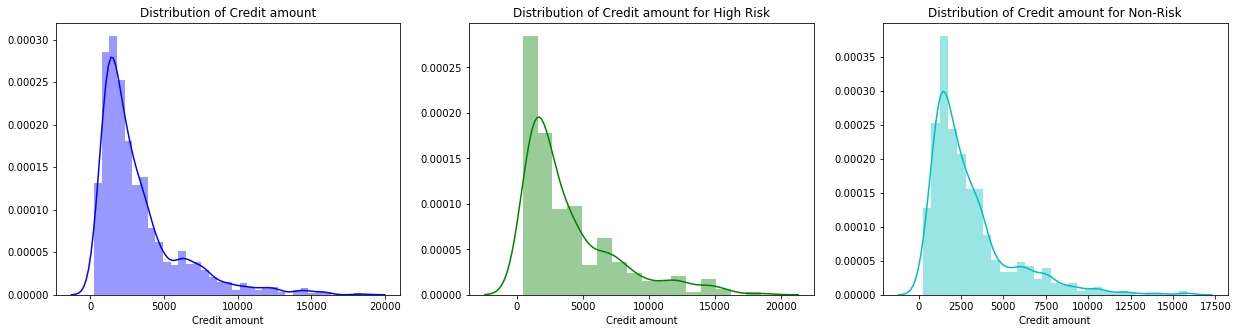

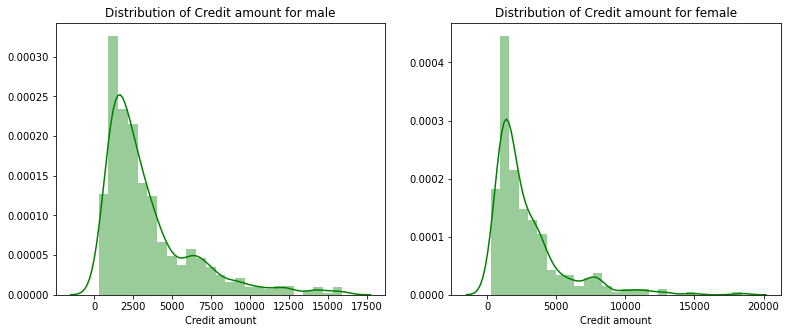

In [13]:
Plot_dis('Credit amount')

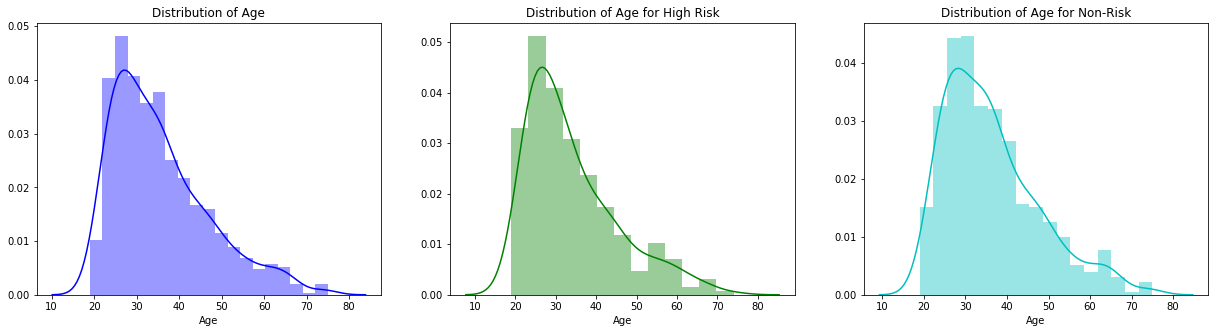

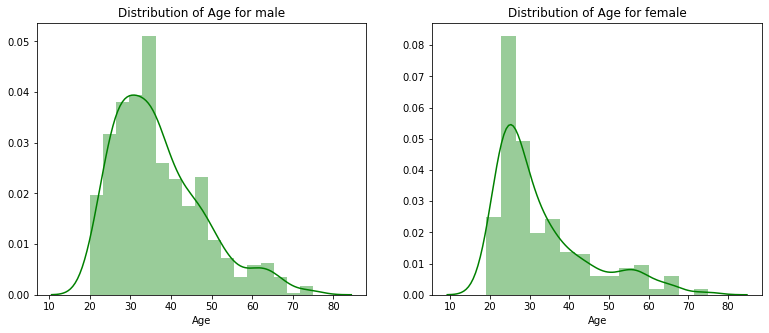

In [20]:
Plot_dis('Age')

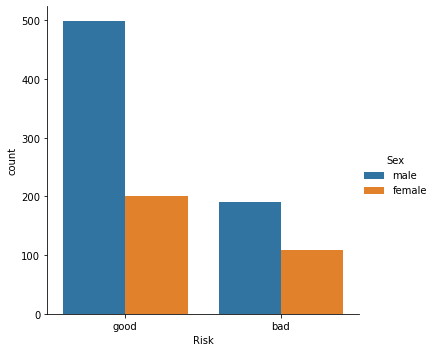

In [22]:
sns.catplot(hue='Sex',kind='count',x='Risk',data=df)

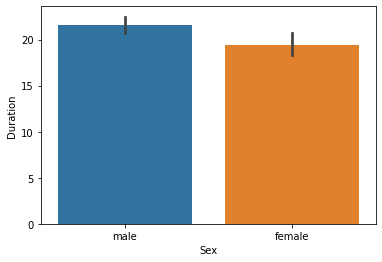

In [70]:
sns.barplot(y='Duration',x='Sex',data=df)

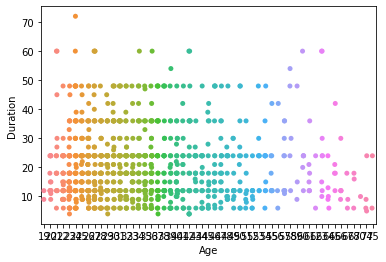

In [74]:
sns.stripplot(y='Duration',x='Age',data=df)

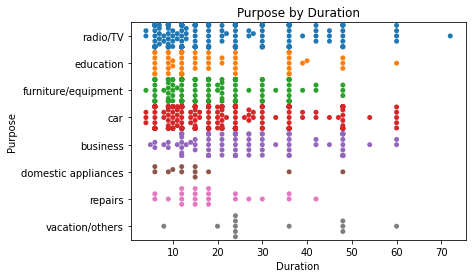

In [80]:
ax = sns.swarmplot(x='Duration',y='Purpose',data=df)
plt.title('Purpose by Duration')
plt.show()

In [27]:
from scipy.stats import ttest_ind

def Series_stats(var, category, prop1, prop2):
# Step 1: State the null and alternative hypothesis and select a level of significance is 5% or 0.05
# Step 2: Collect data and calculate the values of test statistic
  s1 = df[(df[category]==prop1)][var]
  s2 = df[(df[category]==prop2)][var]
  t, p = ttest_ind(s1,s2,equal_var = False)

  print("Two-sample t-test: t={}, p={}".format(round(t,5),p))
# Step 3: Compare the probability associated with the test statistic with level of significance specified
  if ((p < 0.05) and (np.abs(t) > 1.96)):
    print("\n REJECT the Null Hypothesis and state that: \n at 5% significance level, the mean {} of {}-{} and {}-{} are not equal.".format(var, prop1, category, prop2, category))
    print("\n YES, the {} of {}-{} differ significantly from {}-{} in the current dataset.".format(var, prop1, category, prop2, category))
    print("\n The mean value of {} for {}-{} is {} and for {}-{} is {}".format(var, prop1, category, round(s1.mean(),2), prop2, category, round(s2.mean(),2)))
  else:
    print("\n FAIL to Reject the Null Hypothesis and state that: \n at 5% significance level, the mean {} of {} - {} and {} - {} are equal.".format(var, prop1, category, prop2, category))
    print("\n NO, the {} of {}-{} NOT differ significantly from {}-{} in the current dataset".format(var, prop1, category, prop2, category))
    print("\n The mean value of {} for {}-{} is {} and for {}-{} is {}".format(var, prop1, category, round(s1.mean(),2), prop2, category, round(s2.mean(),2)))

In [29]:
Series_stats('Credit amount','Risk','good','bad')

Two-sample t-test: t=-4.26422, p=2.477713335048265e-05

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean Credit amount of good-Risk and bad-Risk are not equal.

 YES, the Credit amount of good-Risk differ significantly from bad-Risk in the current dataset.

 The mean value of Credit amount for good-Risk is 2985.46 and for bad-Risk is 3938.13


In [30]:
Series_stats('Credit amount','Sex','male','female')

Two-sample t-test: t=3.09036, p=0.0020835078745689356

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean Credit amount of male-Sex and female-Sex are not equal.

 YES, the Credit amount of male-Sex differ significantly from female-Sex in the current dataset.

 The mean value of Credit amount for male-Sex is 3448.04 and for female-Sex is 2877.77


In [40]:
Series_stats('Credit amount','Job',1,2)

Two-sample t-test: t=-4.06283, p=5.859603725547918e-05

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean Credit amount of 1-Job and 2-Job are not equal.

 YES, the Credit amount of 1-Job differ significantly from 2-Job in the current dataset.

 The mean value of Credit amount for 1-Job is 2358.52 and for 2-Job is 3070.97


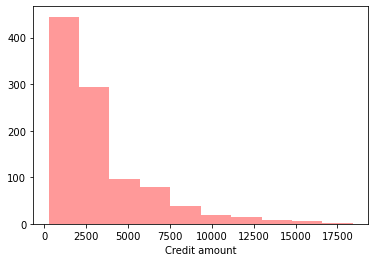

In [81]:
sns.distplot(df['Credit amount'], kde=False, color='red', bins=10)

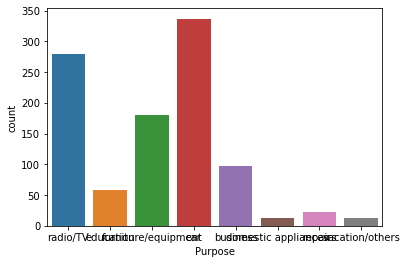

In [82]:
sns.countplot(x = 'Purpose', data=df)

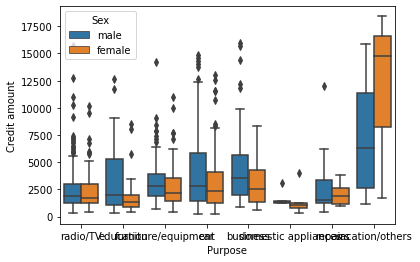

In [83]:
sns.boxplot(x='Purpose', y='Credit amount', data=df, hue='Sex')

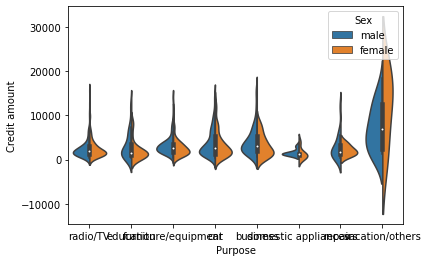

In [84]:
sns.violinplot(x='Purpose', y='Credit amount', data=df, hue='Sex',split=True)

In [87]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_category',
       'Duration_category'],
      dtype='object')

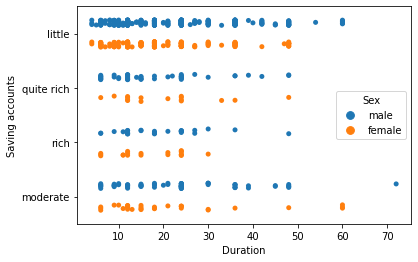

In [88]:
sns.stripplot(x='Duration', y='Saving accounts',data=df, jitter=True, hue='Sex', dodge=True)

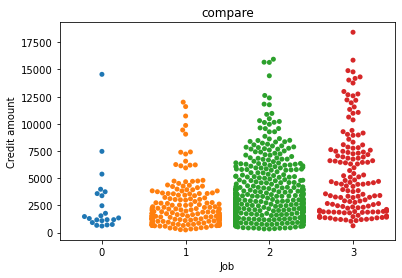

In [100]:
ax = sns.swarmplot(x='Job', y='Credit amount', data=df)
plt.title('compare')
plt.show()

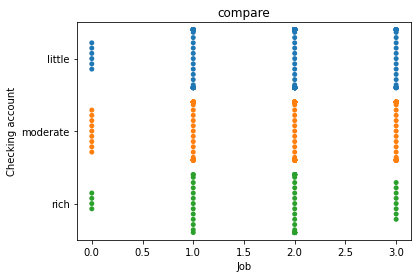

In [104]:
ax = sns.swarmplot(x='Job', y='Checking account', data=df)
plt.title('compare')
plt.show()

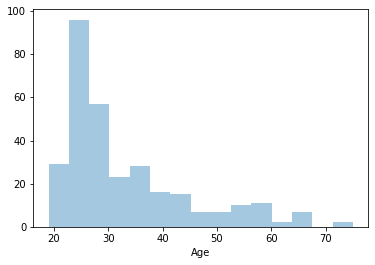

In [36]:
df2 = df[df.Sex == 'female']
sns.distplot(df2['Age'],  kde=False, label='female')

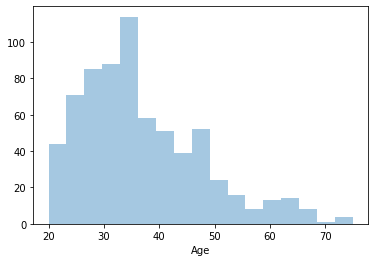

In [37]:
df1 = df[df.Sex == 'male']
sns.distplot(df1['Age'],  kde=False,label='male')

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

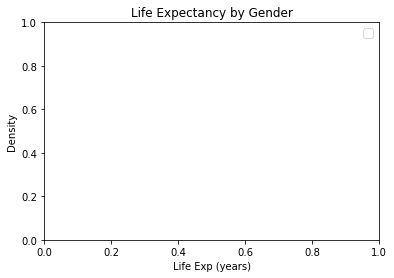

In [38]:
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy by Gender')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')


In [ ]:
df = df[df.continent == '']
sns.distplot(df['lifeExp'], hist = False, kde = True, label='Africa')
df = df[df.continent == 'Americas']
sns.distplot(df['lifeExp'], hist = False, kde = True, label='Americas')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy vs ')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')  

In [41]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

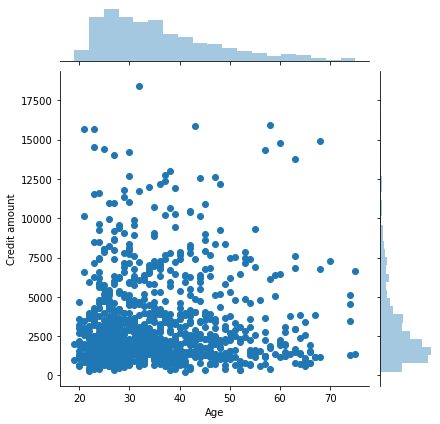

In [42]:
sns.jointplot(x='Age',y='Credit amount',data=df)

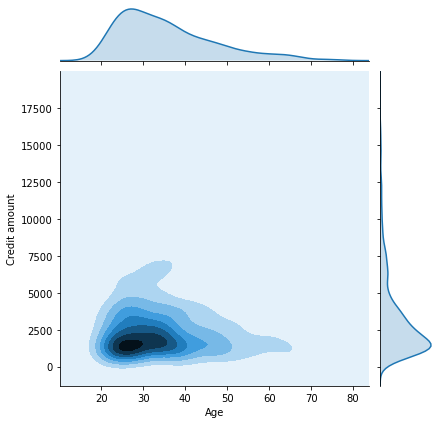

In [105]:
sns.jointplot(x='Age',y='Credit amount',data=df, kind='kde')

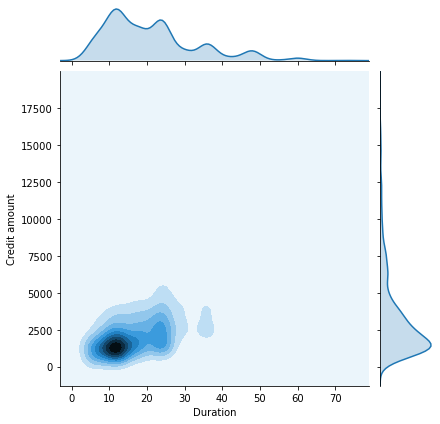

In [107]:
sns.jointplot(x='Duration',y='Credit amount',data=df, kind='kde')

C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sofia.zabit\Anaconda3\lib\site-packages\s

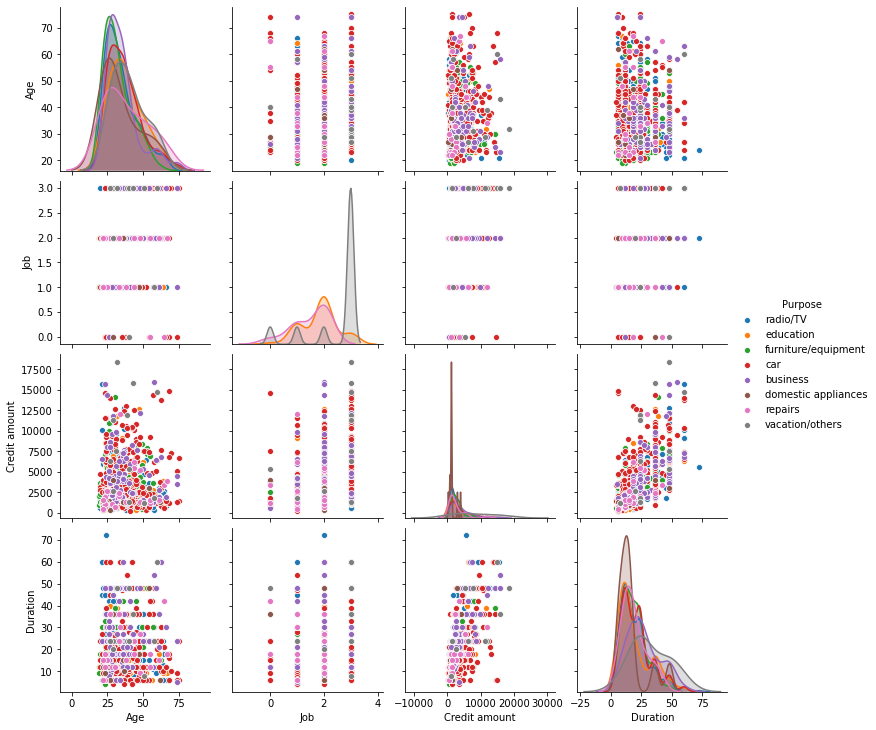

In [108]:
sns.pairplot(df, hue='Purpose', size=2.5)

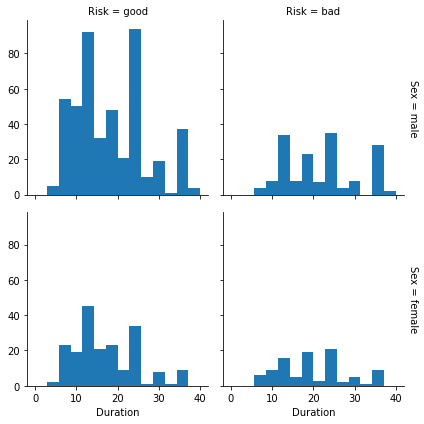

In [111]:
grid = sns.FacetGrid(df, row='Sex', col="Risk", margin_titles=True)
grid.map(plt.hist, "Duration", bins=np.linspace(0, 40, 15));

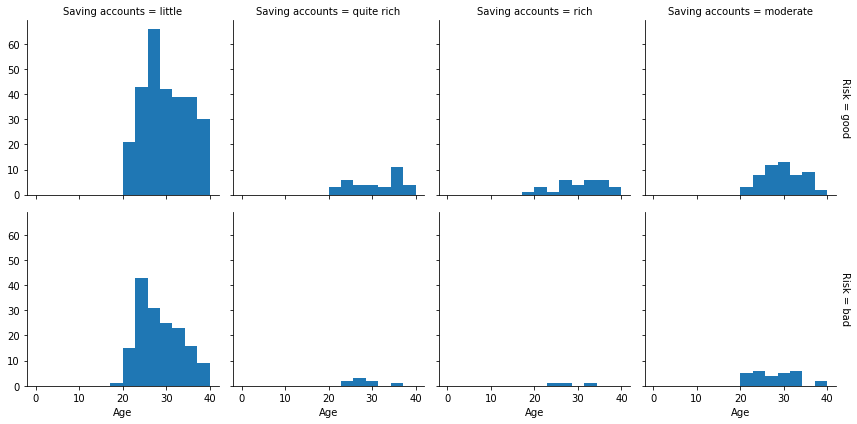

In [118]:
grid = sns.FacetGrid(df, row='Risk', col="Saving accounts", margin_titles=True)
grid.map(plt.hist, "Age", bins=np.linspace(0, 40, 15));

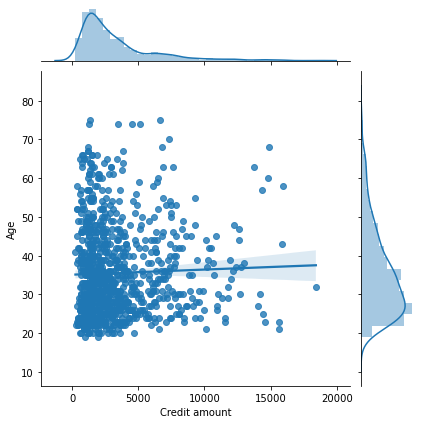

In [124]:
sns.jointplot("Credit amount", "Age", data=df, kind="reg");

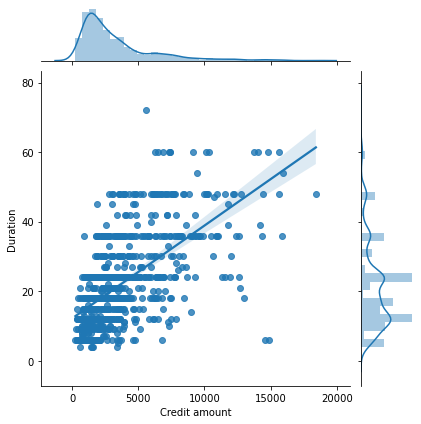

In [126]:
sns.jointplot("Credit amount", "Duration", data=df, kind="reg");

C:\Users\sofia.zabit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


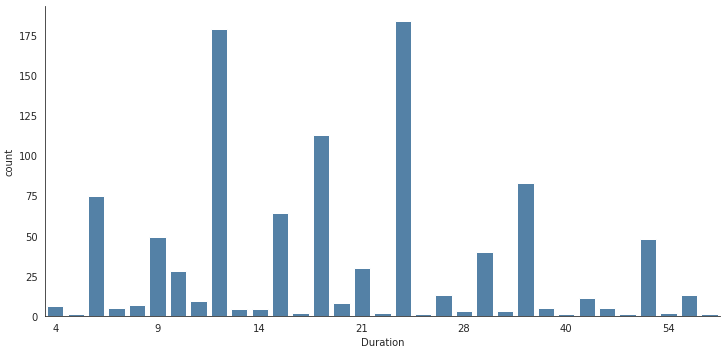

In [127]:
with sns.axes_style('white'):
    g = sns.factorplot("Duration", data=df, aspect=2,
                      kind="count", color='steelblue')
    g.set_xticklabels(step=5)

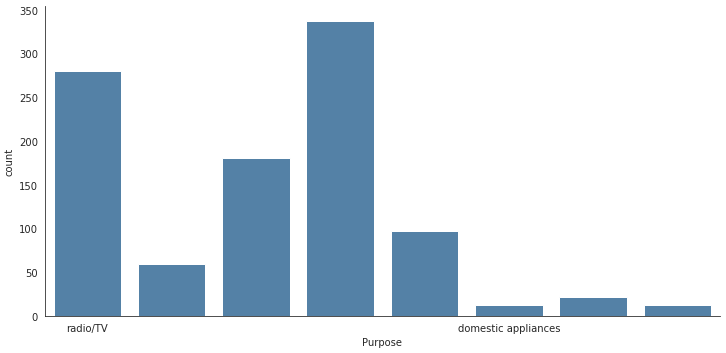

In [131]:
with sns.axes_style('white'):
    g = sns.factorplot("Purpose", data=df, aspect=2,
                      kind="count", color='steelblue')
    g.set_xticklabels(step=5)

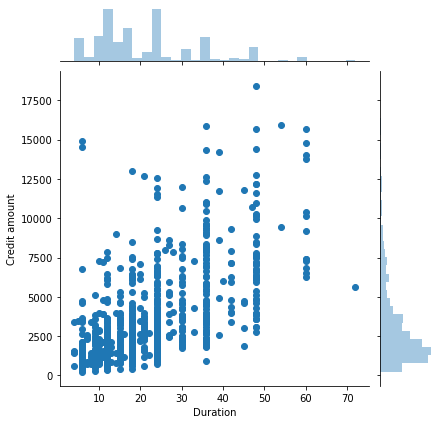

In [44]:
sns.jointplot(x='Duration',y='Credit amount',data=df)

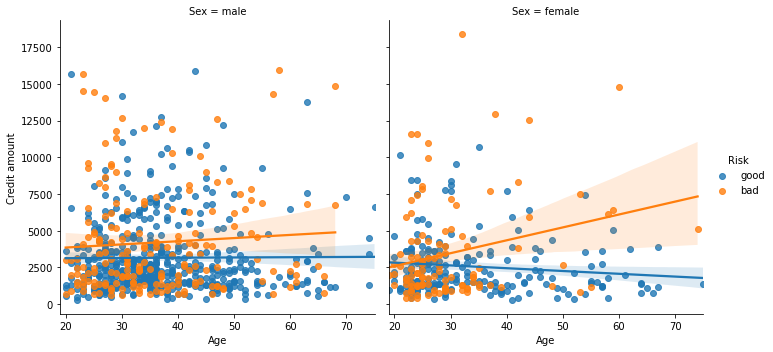

In [45]:
sns.lmplot(y='Credit amount',x='Age',hue='Risk',col='Sex',data=df)

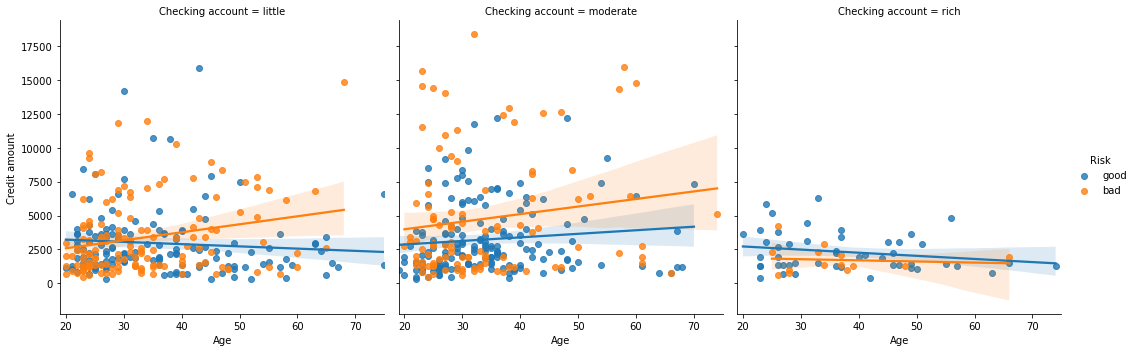

In [49]:
sns.lmplot(y='Credit amount',x='Age',col='Checking account',hue='Risk', data=df)

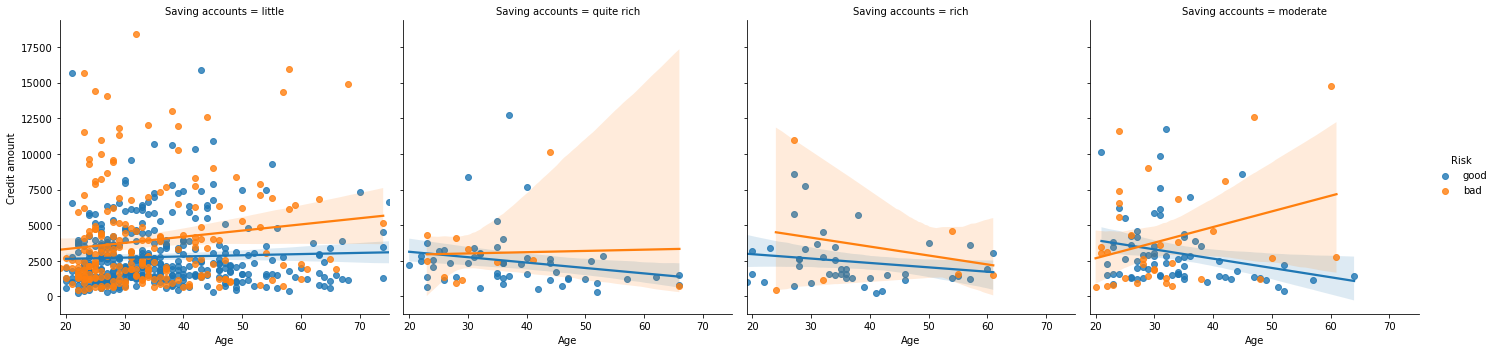

In [51]:
sns.lmplot(y='Credit amount',x='Age',col='Saving accounts',hue='Risk', data=df)

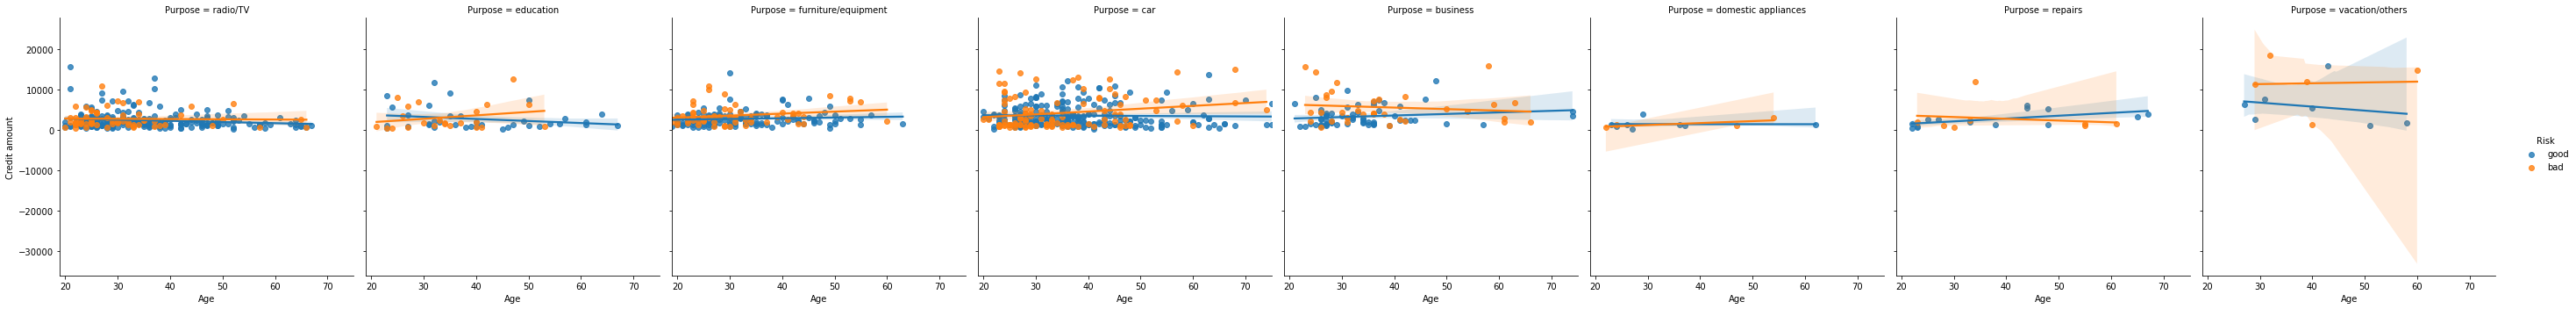

In [52]:
sns.lmplot(y='Credit amount',x='Age',col='Purpose',hue='Risk', data=df)

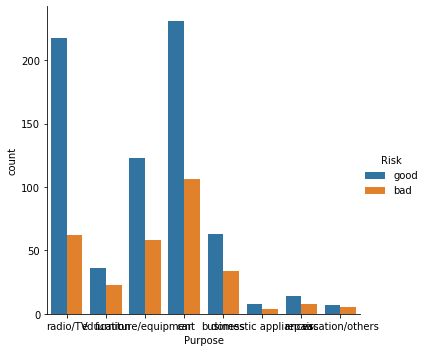

In [53]:
sns.catplot(hue='Risk',kind='count',x='Purpose',data=df)

In [55]:
# Function used to create a new column data: applied for age and weight categories
def Add_column(new_column_name, var, key, value):
  conditions = [(df[var] < key[0]),
    (df[var] >= key[0]) & (df[var] < key[1]),
    (df[var] >= key[1]) & (df[var] < key[2]),
    (df[var] >= key[2])]
  # create a new column and use np.select to assign values to it using our lists as arguments
  df[new_column_name] = np.select(conditions, value)
  df[new_column_name].value_counts().plot.pie(autopct="%.1f%%")

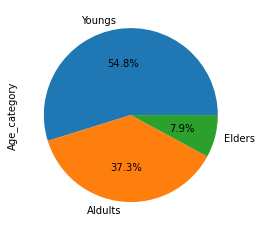

In [56]:
age = [18,35,55]
val = ['Teen', 'Youngs', 'Aldults','Elders']
Add_column('Age_category','Age', age, val)


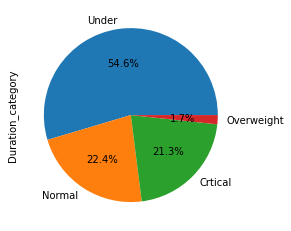

In [58]:
Du = [18.5, 24.9, 29.9]
val = ['Under', 'Normal', 'Overweight','Crtical']
Add_column('Duration_category','Duration', Du, val)

In [59]:
def Plot_box(text):
  fig, axes = plt.subplots(3, 2, figsize=(15, 15))
  fig.suptitle('Box plot of {}'.format(text))
  sns.boxplot(ax=axes[0, 0], data=df, y=text, x='Age_category',hue='Risk')
  sns.boxplot(ax=axes[0, 1], data=df, y=text, x='Age_category',hue='Sex')
  sns.boxplot(ax=axes[1, 0], data=df, y=text, x='Duration_category',hue='Risk')
  sns.boxplot(ax=axes[1, 1], data=df, y=text, x='Duration_category',hue='Sex')
  sns.boxplot(ax=axes[2, 0], data=df, y=text, x='Job')
  sns.boxplot(ax=axes[2, 1], data=df, y=text, x='Purpose',hue='Risk')

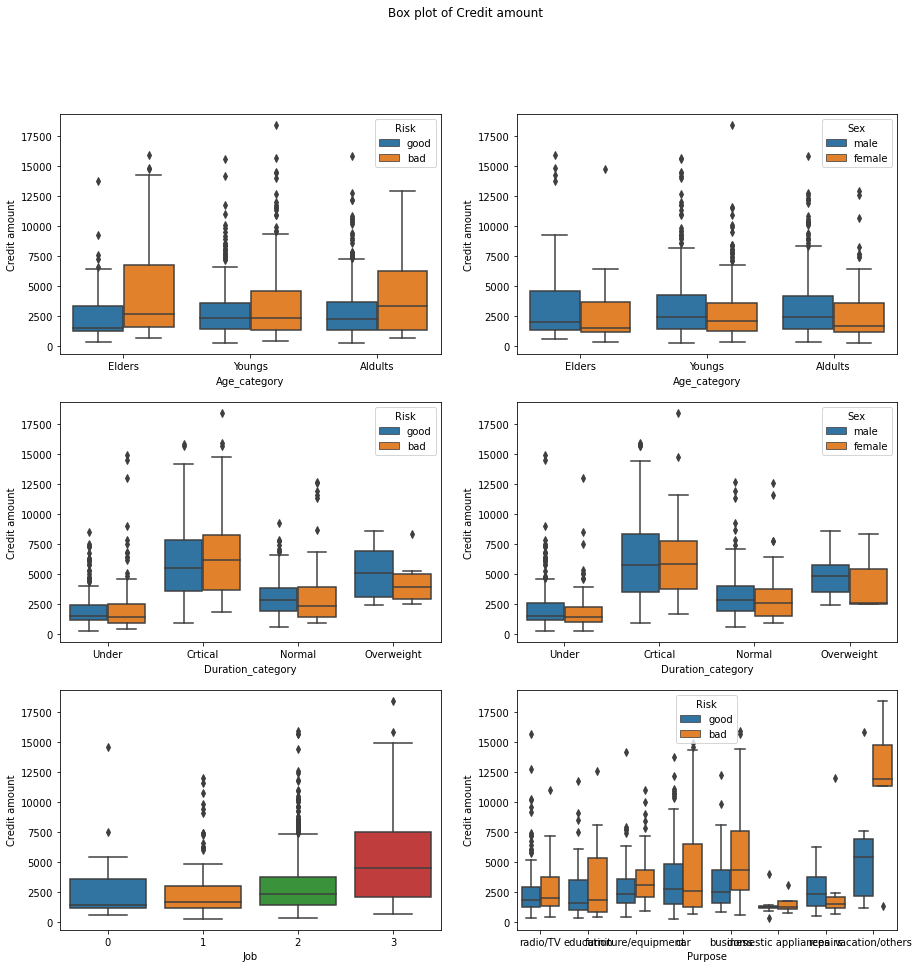

In [60]:
Plot_box('Credit amount')

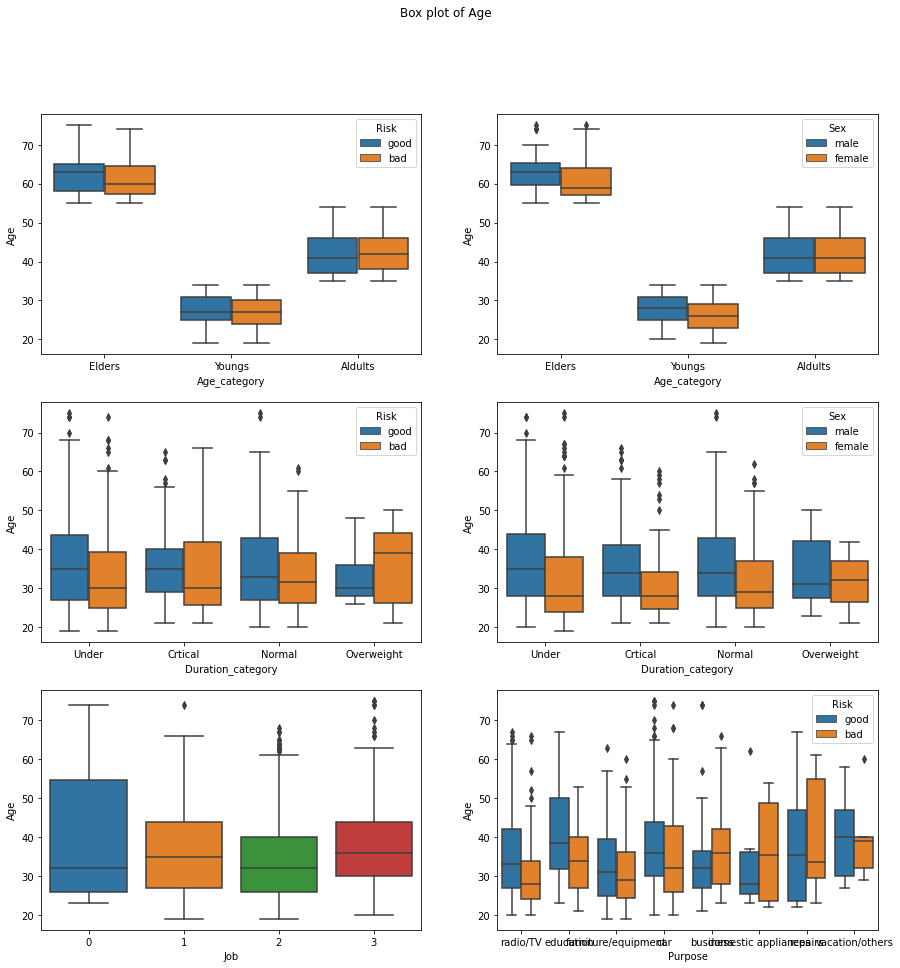

In [61]:
Plot_box('Age')

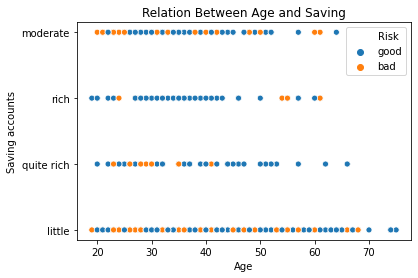

In [64]:
plt.title('Relation Between Age and Saving')
sns.scatterplot(x = df['Age'], y= df['Saving accounts'] , hue = df['Risk'])
plt.show()

In [132]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_category',
       'Duration_category'],
      dtype='object')

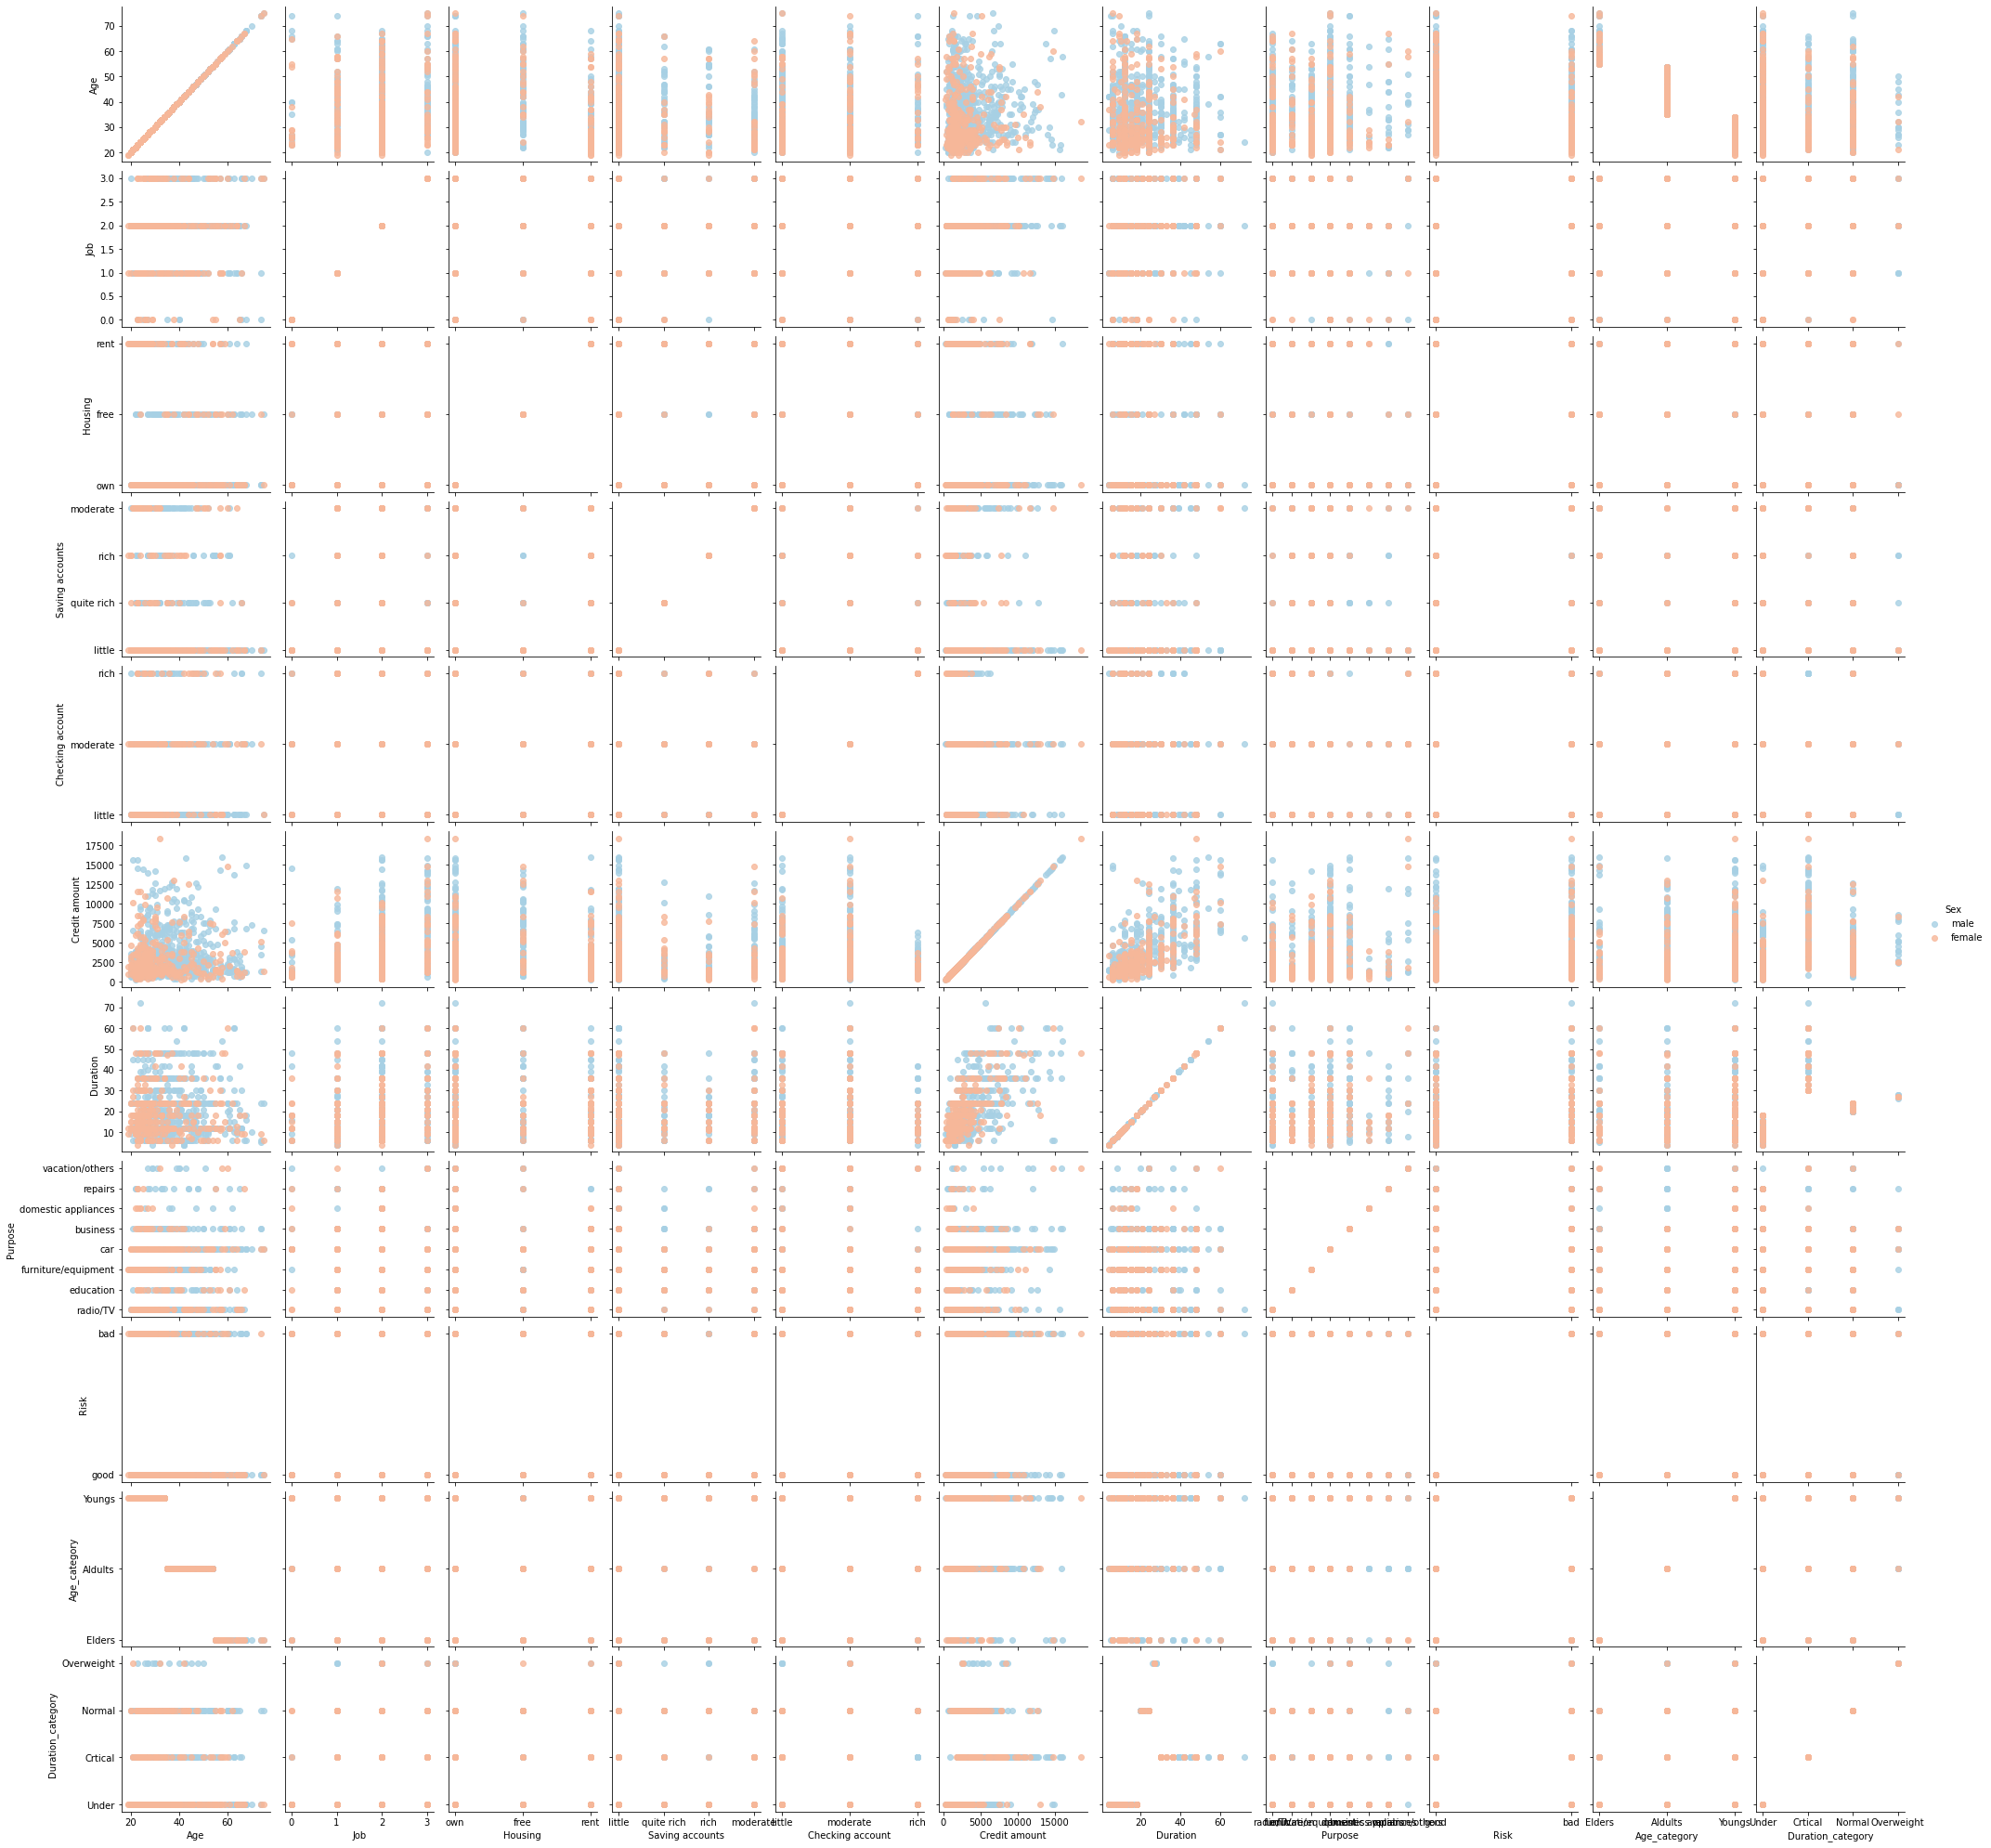

In [134]:
g = sns.PairGrid(df, vars=['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_category',
       'Duration_category'], hue ='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

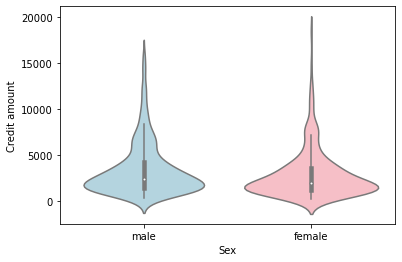

In [135]:
sns.violinplot("Sex", "Credit amount", data=df,
              palette=["lightblue","lightpink"])

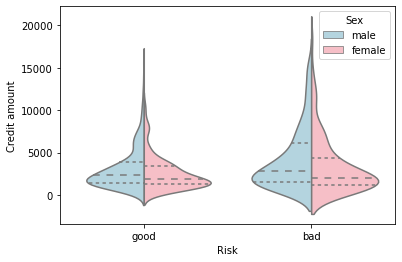

In [138]:
men = (df.Sex =='male')
Women = (df.Sex =='female')

with sns.axes_style(style=None):
    sns.violinplot("Risk", "Credit amount", hue= "Sex", data=df, 
                   split=True, inner="quartile",
                  palette=["lightblue","lightpink"]);